In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('weightheight_data.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


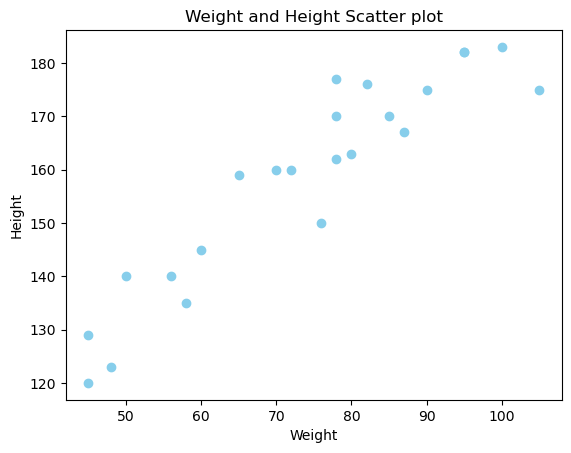

In [34]:
##Scatter plot
plt.scatter(df['Weight'] ,df['Height'], c = 'skyblue')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight and Height Scatter plot')
plt.show()

In [35]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


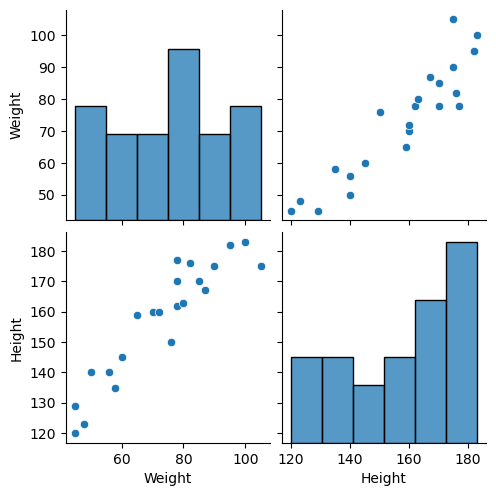

In [36]:
##f Seaborn for visualization
import seaborn as sns
sns.pairplot(data = df)
plt.show()

In [37]:
## Independent and dependent features
X = df[['Weight']] ## Independent features should be data  frame or 2D array
Y = df['Height']  ## Dependent feature need to be 1D or it can be series
print(X.shape, Y.shape)

(23, 1) (23,)


In [38]:
## Train Test split
from sklearn.model_selection  import train_test_split


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 45 )

In [40]:
### Standardization
from sklearn.preprocessing import StandardScaler

In [41]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [42]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [43]:
regression = LinearRegression(n_jobs= -1)
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [44]:
print("Coefficient or slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient or slope :  [1.19430811]
Intercept :  70.89384281981009


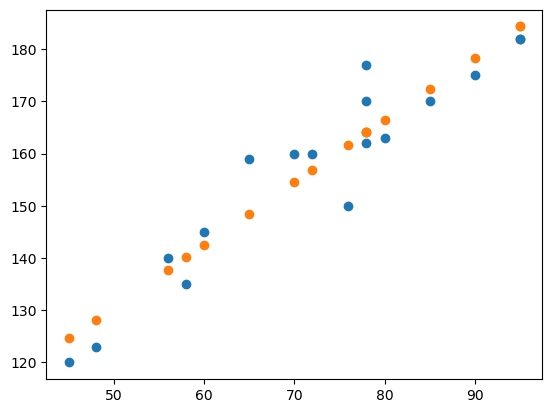

In [45]:
##  Plot Training and plot best fit line
plt.scatter(X_train, Y_train)
plt.scatter(X_train,  regression.predict(X_train))
plt.show()


In [46]:
## prediction for test data
y_pred = regression.predict(X_test)

In [47]:
y_pred

array([196.29619479, 174.79864873, 130.60924852, 190.32465422,
       124.63770795, 168.82710816])

In [48]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [49]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ", mae)
print("RMSE : ", rmse)

MSE :  121.11059607743941
MAE :  9.557572184332969
RMSE :  11.005025946241082


In [50]:
## R-square
### coefficient of determination SSR = sum of square of residual SST = total sum of squares
from sklearn.metrics import r2_score
score = r2_score(y_pred, Y_test )
print(score)

0.8399385567301578


In [51]:
## OLS linear regression
import statsmodels.api as sn


In [52]:
model = sn.OLS(Y_train, X_train).fit()

In [53]:
prediction = model.predict(X_test)
print(prediction)

12    224.261192
19    185.816417
16    106.791044
13    213.582088
20     96.111940
10    175.137312
dtype: float64


In [54]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1677.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                    1.26e-17
Time:                        15:03:28   Log-Likelihood:                         -70.598
No. Observations:                  17   AIC:                                      143.2
Df Residuals:                      16   BIC:                                      144.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [55]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.87000543])

In [56]:
from sklearn.metrics import r2_score
r2_score(Y_test, regression.predict(X_test))

0.6976434494599294

In [57]:
import pickle

In [58]:
with open('model.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [59]:
import pandas as pd
import numpy as np
import sklearn 

print('Pandas: ', pd.__version__)
print('numpy : ', np.__version__)
print('Sklearn : ', sklearn.__version__)


Pandas:  2.2.2
numpy :  1.26.4
Sklearn :  1.5.1
